## Fully-Connected MLP

This notebook will take a closer look at a fully-connected MLP with two hidden layers to solve MNIST.  First, lets look at a solution and metrics:

In [2]:
# MNIST Logistic Regression
import idx2numpy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

X = idx2numpy.convert_from_file('train-images-idx3-ubyte')
y = idx2numpy.convert_from_file('train-labels-idx1-ubyte')
X = X.reshape(X.shape[0],-1)

X_test = idx2numpy.convert_from_file('t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels-idx1-ubyte')
# reduce dimensions on X.  Keep first dim but combine second and third
X_test = X_test.reshape(X_test.shape[0],-1)

# Now a fully connected deep model.
#one more model with different sized hidden layer
mlpdeep = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(100, 50), random_state=1)
mlpdeep.fit(X,y)
y_predicted = mlpdeep.predict(X_test)
print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.96      0.96      1032
          3       0.96      0.96      0.96      1010
          4       0.97      0.96      0.96       982
          5       0.95      0.96      0.96       892
          6       0.98      0.97      0.97       958
          7       0.97      0.97      0.97      1028
          8       0.96      0.96      0.96       974
          9       0.95      0.94      0.95      1009

avg / total       0.97      0.97      0.97     10000



The model we created above has a 97% average F1 score on the test data.  That's not bad.  Note that this model has two hidden layers.  What do those hidden layers do?  



In [15]:
[s.shape for s in mlpdeep.coefs_]

[(784, 100), (100, 50), (50, 10)]

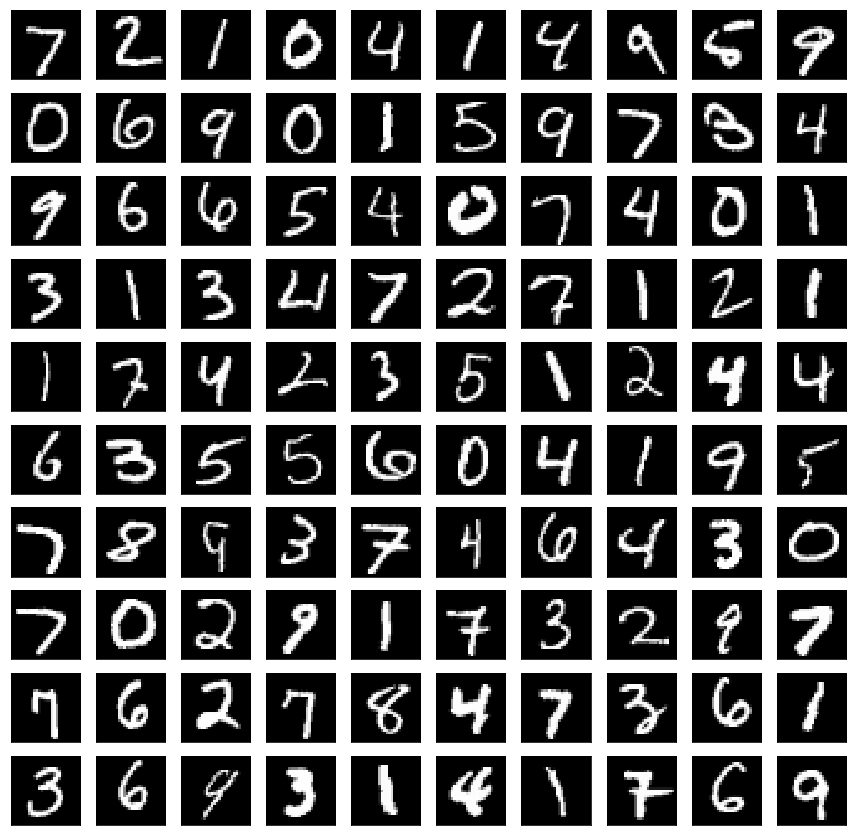

In [28]:
# let's display some inputs to see what we are matching
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(15,15))
for inpic, ax in zip(X_test, axes.ravel()):
    ax.matshow(inpic.reshape(28,28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

    
plt.show()

Lets look at the first layer and see what is there.

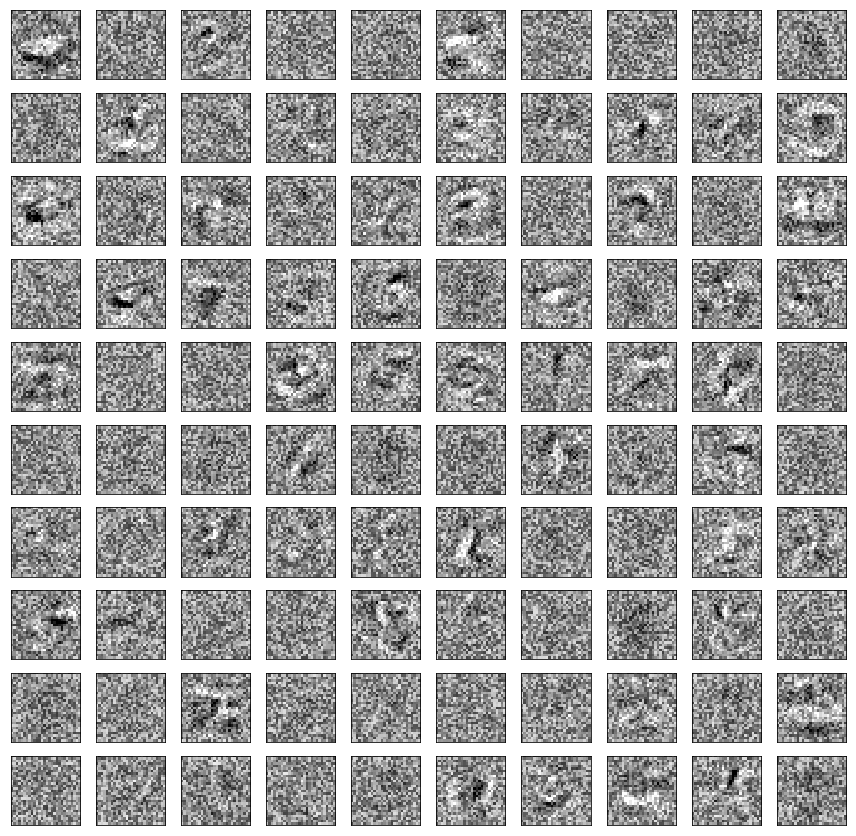

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(15,15))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpdeep.coefs_[0].min(), mlpdeep.coefs_[0].max()
for coef, ax in zip(mlpdeep.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


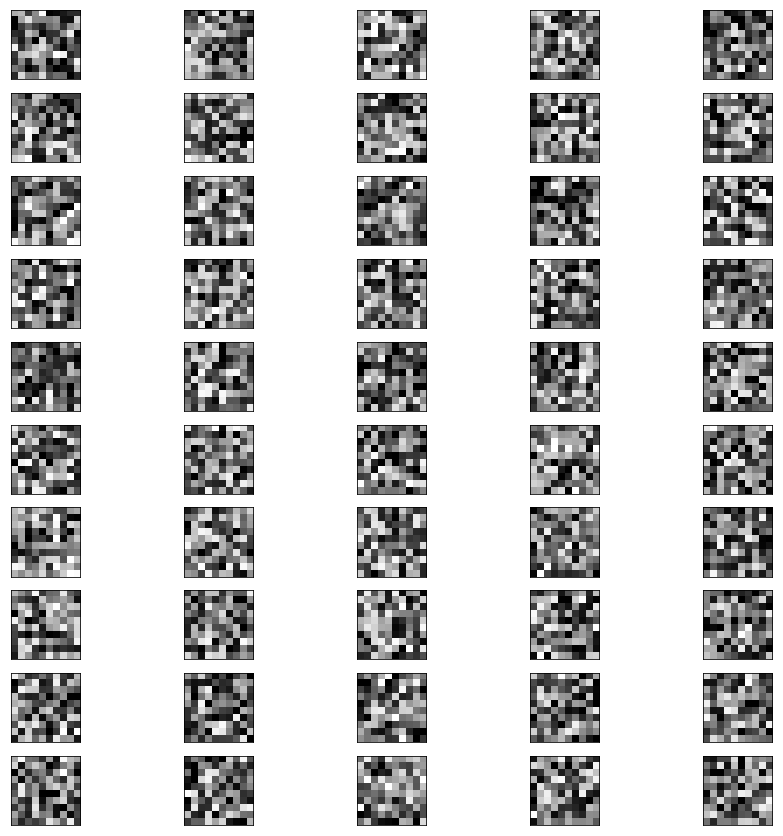

In [23]:
# Now the second layer
fig, axes = plt.subplots(10, 5, figsize=(15,15))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpdeep.coefs_[1].min(), mlpdeep.coefs_[1].max()
for coef, ax in zip(mlpdeep.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


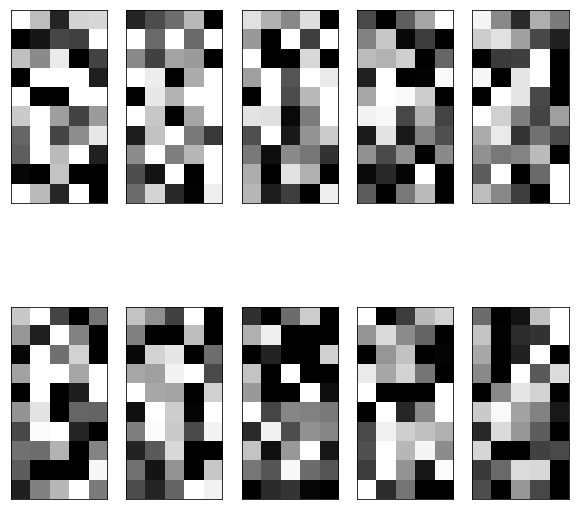

In [26]:
# Now the third layer
fig, axes = plt.subplots(2, 5, figsize=(10,10))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpdeep.coefs_[2].min(), mlpdeep.coefs_[2].max()
for coef, ax in zip(mlpdeep.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 5), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()
